In [1]:
import numpy as np

import corner 

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams 
rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5


In [2]:
# calculate Enceladus 
# first file: See Helmi 2018 plot 1
source_id1,vx,vy,vz,En,Lz1,flag_enc = np.genfromtxt('../../Gaia/41586_2018_625_MOESM1_ESM.csv', delimiter=',', unpack=True, skip_header=1)
# second file: See Helmi+ 2018 plot 3?
source_id5,l,b,parallax,parallax_error,mu_l,mu_b,Lz5,flag_stars = np.genfromtxt('../../Gaia/41586_2018_625_MOESM5_ESM.csv', delimiter = ',', unpack = True, skip_header=1)                                                                        

# convert sourceIDs to int
source_id1 = source_id1.astype(int)
source_id5 = source_id5.astype(int)

# limit to Enceladus stars (flag_enc = 2) and exclude ?some? stars (flag_stars = 0)
i_1 = np.isin(source_id1[flag_enc ==2], source_id5[flag_stars ==0]) # to use w/ source_id1 and its things t/w/ flag_enc == 2
i_5 = np.isin(source_id5[flag_stars ==0], source_id1[flag_enc ==2]) # to use w/ source_id5 and its things t/w/ flag_stars == 0

# final source IDs to compare with Wilmas data
sourceID = source_id1[flag_enc == 2][i_1]


OSError: ../../Gaia/41586_2018_625_MOESM1_ESM.csv not found.

In [ ]:
#import Gaia data 

In [12]:
#ids_enc, jR_enc, lz_enc, jz_enc = np.loadtxt('../files/Enceladus_MWPotential_actions.txt')
jR_kpckms_halo, lz_kpckms_halo, jz_kpckms_halo = np.loadtxt('../files/Gaia_halo_actions_MW14.txt')
jR_kpckms_disk, lz_kpckms_disk, jz_kpckms_disk = np.loadtxt('../files/Gaia_disk_actions_MW14.txt')

In [13]:
data_enc_cut = (jR_enc<=3000. )* (jz_enc<= 500)
data_enc = np.vstack([jR_enc[data_enc_cut], lz_enc[data_enc_cut], jz_enc[data_enc_cut]])

data_halo_cut = (jR_kpckms_halo<=3000. )* (jz_kpckms_halo<= 500)
data_halo = np.vstack([jR_kpckms_halo[data_halo_cut], lz_kpckms_halo[data_halo_cut], jz_kpckms_halo[data_halo_cut]])

data_disk_cut = (jR_kpckms_disk<=3000. )* (jz_kpckms_disk<= 500)
data_disk = np.vstack([jR_kpckms_disk[data_disk_cut], lz_kpckms_disk[data_disk_cut], jz_kpckms_disk[data_disk_cut]])


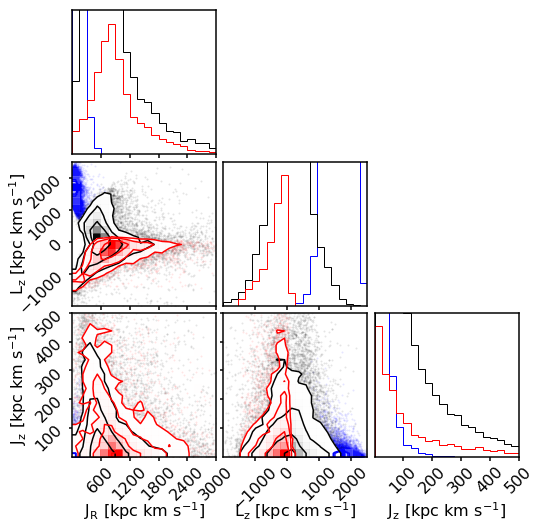

In [33]:
jrange = ((0, 3000), (-2000, 2500), (0,500))
labels = ['J$_\mathrm{R}$ [kpc km s$^{-1}$]', 'L$_\mathrm{z}$ [kpc km s$^{-1}$]', 'J$_\mathrm{z}$ [kpc km s$^{-1}$]']
fig = corner.corner(data_disk.transpose(),  range=jrange,plot_contours = 1, color = 'blue')
corner.corner(data_halo.transpose(), labels = labels, range=jrange, plot_contours = 1, color = 'black', fig = fig)
corner.corner(data_enc.transpose(),  range=jrange,plot_contours = 1, color = 'red', fig = fig)

plt.show()